# Formate perovskites
Here, we search for inverse perovskite structures, which include the formate anion. The result could be achieved using many fewer lines of codes + inbuilt `smact` functions, but the methodology is written out explicitly here for transparency. 

In [15]:
get_ipython().magic(u'matplotlib inline')
import smact
import smact.lattice as lattice
import smact.builder as builder
import smact.screening as screening
import copy
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from smact import data_directory as data_directory

We define the positions and allowed oxidation states at each lattice site

In [7]:
site_A = lattice.Site([0,0,0],[-1])
site_B = lattice.Site([0.5,0.5,0.5],[+5,+4])
site_C = lattice.Site([0.5,0.5,0.5],[-2,-1])
perovskite = lattice.Lattice([site_A,site_B,site_C],space_group=221)

We search through the elements of interest and find those that are allowed on each site. In this example, we use the F- anion with an increased Shannon radius to simulate the formate anion.

In [28]:
search = smact.ordered_elements(3,87)

A_list = []
B_list = []
C_list = [['F',-1,4.47]]
for element in search:
    with open(os.path.join(data_directory, 'shannon_radii.csv'),'r') as f:
        reader = csv.reader(f)
        r_shannon=False
        for row in reader:
            if row[0]==element and int(row[1]) in site_A.oxidation_states:
                A_list.append([row[0],int(row[1]),float(row[4])])
            if row[2]=="6_n" and row[0]==element and int(row[1]) in site_B.oxidation_states:
                B_list.append([row[0],int(row[1]),float(row[4])])

We go through and apply the electronegativity order test (pauling_test) to each combo. Then, we use Goldschmidt tolernace factor to group into crystal structure types.

In [31]:
charge_balanced = []
goldschmidt_cubic = []
goldschmidt_ortho = []
a_too_large = []
A_B_similar = []
pauling_perov = []
anion_stats = []
for C in C_list:
    anion_hex = 0
    anion_cub = 0
    anion_ort = 0
    for B in B_list:
        for A in A_list:
            if B[0] != A[0]:        
                if C[0] != A[0] and C[0] != B[0]:
                    if int(A[1])+int(B[1])+3*int(C[1]) == 0:
                        charge_balanced.append([A[0],B[0],C[0]])
                        paul_a = smact.Element(A[0]).pauling_eneg
                        paul_b = smact.Element(B[0]).pauling_eneg
                        paul_c = smact.Element(C[0]).pauling_eneg
                        electroneg_makes_sense = screening.pauling_test([A[1],B[1],C[1]], [paul_a,paul_b,paul_c])
                        if electroneg_makes_sense:
                            pauling_perov.append([A[0],B[0],C[0]])
                            tol = (float(A[2]) + C[2])/(np.sqrt(2)*(float(B[2])+C[2]))
                            if tol > 1.0:
                                a_too_large.append([A[0],B[0],C[0]])
                                anion_hex = anion_hex+1
                            if tol > 0.9 and tol <= 1.0:
                                goldschmidt_cubic.append([A[0],B[0],C[0]])
                                anion_cub = anion_cub + 1
                            if tol >= 0.71 and tol < 0.9:
                                goldschmidt_ortho.append([A[0],B[0],C[0]])
                                anion_ort = anion_ort + 1
                            if tol < 0.71:
                                A_B_similar.append([A[0],B[0],C[0]])
    anion_stats.append([anion_hex,anion_cub,anion_ort])

[[1, 40, 58]]
Number of possible charge neutral perovskites from Li to Fr = 99
Number of Pauling senseibe perovskites from Li to Fr = 99
Number of possible cubic perovskites from Li to Fr = 40
Number of possible ortho perovskites from Li to Fr = 58
Number of possible hexagonal perovskites from Li to Fr = 1
Number of possible non-perovskites from Li to Fr = 0
----------------------------------------------------------------
Structures identified with cubic tolerance factor 0.9 < t < 1.0 
----------------------------------------------------------------
Cl C (HCOO)3
Br C (HCOO)3
Cl Si (HCOO)3
Br Si (HCOO)3
I Si (HCOO)3
Cl S (HCOO)3
Br S (HCOO)3
I S (HCOO)3
I Ti (HCOO)3
Br V (HCOO)3
I V (HCOO)3
Br Cr (HCOO)3
I Cr (HCOO)3
Br Mn (HCOO)3
I Mn (HCOO)3
I Fe (HCOO)3
Br Co (HCOO)3
I Co (HCOO)3
Br Ni (HCOO)3
I Ni (HCOO)3
Br Ge (HCOO)3
I Ge (HCOO)3
Br Se (HCOO)3
I Se (HCOO)3
I Zr (HCOO)3
I Nb (HCOO)3
I Mo (HCOO)3
I Tc (HCOO)3
I Ru (HCOO)3
I Rh (HCOO)3
I Pd (HCOO)3
I Sn (HCOO)3
I Tb (HCOO)3
I Hf (HCO

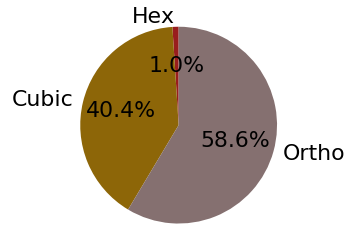

In [33]:
print (anion_stats)
colours=['#991D1D','#8D6608','#857070']
matplotlib.rcParams.update({'font.size': 22})
plt.pie(anion_stats[0],labels=['Hex','Cubic','Ortho']
        ,startangle=90,autopct='%1.1f%%',colors=colours)
plt.axis('equal')
plt.savefig('Form-perovskites.png')

print ('Number of possible charge neutral perovskites from', search[0], 'to', search[len(search)-1], '=', len(charge_balanced))
print ('Number of Pauling senseibe perovskites from', search[0], 'to', search[len(search)-1], '=', len(pauling_perov))
print ('Number of possible cubic perovskites from', search[0], 'to', search[len(search)-1], '=', len(goldschmidt_cubic))
print ('Number of possible ortho perovskites from', search[0], 'to', search[len(search)-1], '=', len(goldschmidt_ortho))
print ('Number of possible hexagonal perovskites from', search[0], 'to', search[len(search)-1], '=', len(a_too_large))
print ('Number of possible non-perovskites from', search[0], 'to', search[len(search)-1], '=', len(A_B_similar))


#print goldschmidt_cubic
print( "----------------------------------------------------------------")
print( "Structures identified with cubic tolerance factor 0.9 < t < 1.0 ")
print( "----------------------------------------------------------------")
for structure in goldschmidt_cubic:
    print( structure[0],structure[1],'(HCOO)3')
